
# Titanic: Machine Learning from Disaster

_____________________________________________________

### <font color=Red><u>Content</u> :-</font>
1. [Importing required libraries and loading data](#Let's-get-started)
2. [Data Analysis](#Data-Analysis)
3. [Data Visualization](#Data-Visualization)
4. [Feature Engineering and Data Preprocessing](#Data-Preprocessing-(and-Feature-Engineering))
5. [Data Modeling](#Data-Modeling)
7. [Making Predictions](#Making-Predictions)
8. [Final thoughts!](#Final-thoughts)

**Overview**  
In this challenge, we try to predict the survial chances of a passesnger onbaord on Titanic (after it strucks iceberg off the course of Newfoundland and sinks ofcourse!) by utilizing the information available to us e.g. Passenger class, ticket fare, age, sex, Pclass etc.  

### Let's get started

Importing required modules and libraries for for data preparation, visualization, modeling and making predictions

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import linear_model, neighbors, ensemble, neural_network, svm

import warnings
warnings.filterwarnings('ignore') # to avoid seeing warnings, you might wanna set it to 'once' or 'always'

Loading data and then doing inital data exploration

In [2]:
data_train = pd.read_csv('C:/Personal/ML/Titanic/train.csv',sep=',')
data_test = pd.read_csv('C:/Personal/ML/Titanic/test.csv',sep=',')

In [3]:
print("---- Data Size ----")
print("Training # Rows: ", data_train.shape[0], " | Columns: ", data_train.shape[1])
print("Test #     Rows: ", data_test.shape[0], " | Columns: ", data_test.shape[1])

---- Data Size ----
Training # Rows:  891  | Columns:  12
Test #     Rows:  418  | Columns:  11


Let's take a peek at the data

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### <font color=green><u>Information about data from Kaggle challenge webpage</u></font>
<br>
<table align=left>
    <tr>
        <td>PassengerId</td>
        <td>ID for each passenger</td>
    </tr>
    <tr>
        <td>Survived</td>
        <td>Survived or Not (0 or 1)</td>
    </tr>
    <tr>
        <td>Pclass</td>
        <td>Class of Travel</td>
    </tr>
    <tr>
        <td>Name</td>
        <td>Name of Passenger</td>
    </tr>
    <tr>
        <td>Sex</td>
        <td>Gender of passenger</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age in years (fractional)</td>
    </tr>
    <tr>
        <td>SibSp</td>
        <td>Number of Sibling/Spouse aboard</td>
    </tr>
    <tr>
        <td>Parch</td>
        <td>Number of Parent/Child aboard</td>
    </tr>
    <tr>
        <td>Ticket</td>
        <td>Ticket Number</td>
    </tr>
    <tr>
        <td>Fare</td>
        <td>Ticket Fare</td>
    </tr>
    <tr>
        <td>Cabin</td>
        <td>Cabin Number</td>
    </tr>
    <tr>
        <td>Embarked</td>
        <td>The port in which a passenger has embarked.<br>C - Cherbourg, S - Southampton, Q = Queenstown</td>
    </tr>
</table>

### Data Analysis

#### Let's check datatypes of each column and how many Not NA values are present

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Let's check Test dataset too

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<font size=4> From initial inspection,  Age, Cabin, Embarked and Fare (in test set) fields seem to have null values </font>

Let's inspect further and check the number of unique, min, max values to catch any outliers

Before that let's first quickly convert few of them to correct datatypes (category)

In [7]:
for col in ['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    data_train[col] = data_train[col].astype('category')
    data_test[col] = data_test[col].astype('category')
    
#data_train['Survived'] = data_train['Survived'].astype('category')

In [8]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891.0,NaN,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,891.0,NaN,3.0,"Somerton, Mr. Francis William",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,1.0,NaN,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Insights 
PassengerId - All unique - Not useful for predicting survival chance - drop the column  
Name - All Unique - drop the column  
Ticket - 681 (~76%) unique values -  
Cabin - 147 unique values - 77% null values, we will not use this column  
Age - between 0.42 to 80 yrs (all positive, seems fine)  
Fare - 0 to 512 (all positive, seems fine)  

In [9]:
data_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.0,418.0,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,418.0,3.0,418,2,NaN,NaN,NaN,363,NaN,76,3
top,1309.0,3.0,"Drew, Mr. James Vivian",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,1.0,218.0,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,NaN,NaN,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,NaN,NaN,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,NaN,NaN,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


PClass, Sex, Age, SibSp, Parch, Fare, Embarked seem to be fine

### Data Visualization

_Let's visalize some of the features to see correlation with target (Survival)_

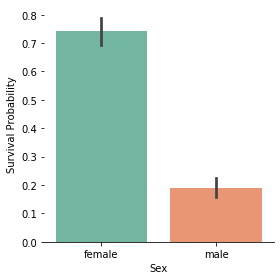

In [10]:
# Let's see how Sex is correlated with Survival of people
g = sns.catplot(x="Sex", y="Survived", data=data_train,aspect=1, height=4, kind="bar", palette="Set2")
g.despine(left=True)
g.set_ylabels("Survival Probability")

**Observation 1:**  
_Females are more likely to Survive as compared to Males_

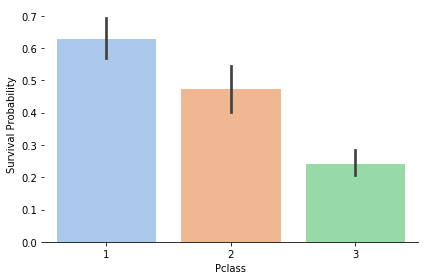

In [11]:
# Let's see how Pclass (Class of travel) is correlated with Survival of people
g = sns.catplot(x="Pclass", y="Survived", data=data_train,aspect=1.5, height=4, kind="bar", palette="pastel")
g.despine(left=True)
g.set_ylabels("Survival Probability")

**Observation 2:**  
_Class of Travel is correlated with Survival, Higher class of travel (class 1) means more probability of surviving_

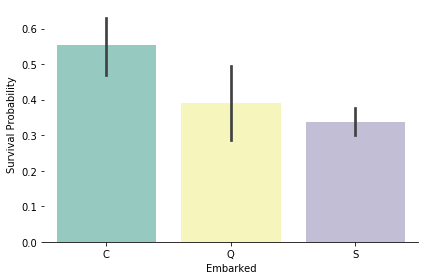

In [12]:
# Let's see how Embarked Port is correlated with Survival of people
g = sns.catplot(x="Embarked", y="Survived", data=data_train,aspect=1.5, height=4, kind="bar", palette="Set3")
g.despine(left=True)
g.set_ylabels("Survival Probability")

**Observation 3:**  
_People embarked at port C are more likely to Survive_

Let's Create Age and Fare bins (groups) to visalize them

In [13]:
data_train['Age_bins'] = pd.cut(data_train['Age'], bins=[5,15,25,35,45,55,65,75,85,95,150])
#data_train['Age_bins'] = pd.cut(data_train['Age'], bins=10)

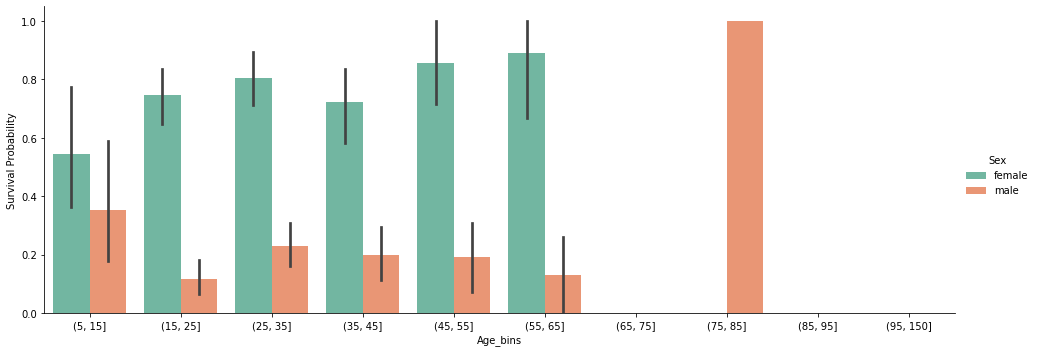

In [14]:
g = sns.catplot(x="Age_bins", y="Survived",hue="Sex", data=data_train,aspect=2.7, height=5, kind="bar", palette="Set2")
g.set_ylabels("Survival Probability")

**Observation 4:**  
_Males only less than 15 yrs old or >= 75 yrs old are more likely to  Survive, females are in general more likely to survive than males but women > 15 year old are more likly to survive as compared to any one else on the ship_

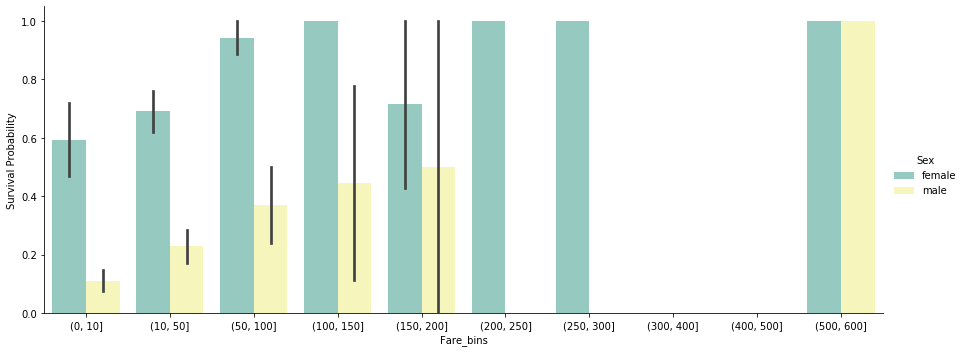

In [15]:
data_train['Fare_bins'] = pd.cut(data_train['Fare'], bins=[0,10,50,100,150,200,250,300,400,500,600])
#data_train['Fare_bins'] = pd.qcut(data_train['Fare'], 6)
g = sns.catplot(x="Fare_bins", y="Survived", hue="Sex", data=data_train,aspect=2.5, kind="bar", palette="Set3")
g.set_ylabels("Survival Probability")

**Observation 5:**  
_Men are more likely to survive as fare goes up  
People in Fare range 150-200 have survived less_

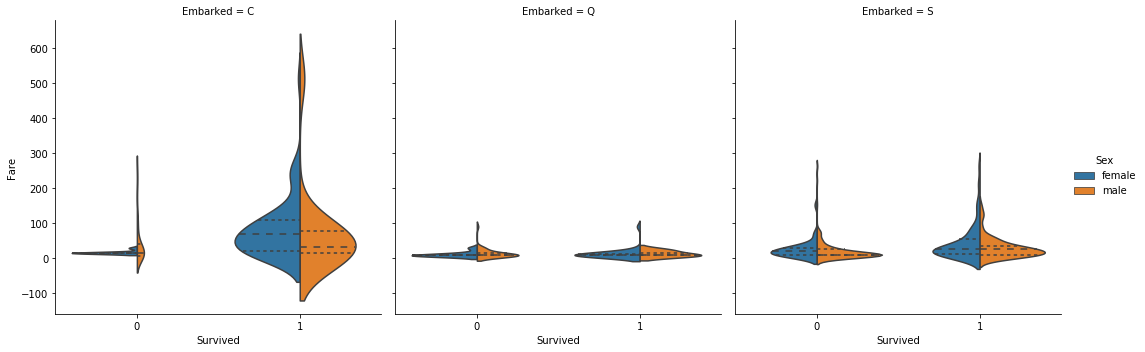

In [16]:
sns.catplot(x="Survived", y="Fare", hue="Sex", kind="violin", col="Embarked", col_wrap=3,
               split=True, inner="quart", data=data_train, orient="v")

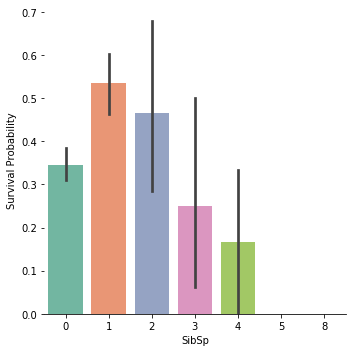

In [17]:
g = sns.catplot(x="SibSp", y="Survived", data=data_train, kind="bar", palette="Set2")
g.despine(left=True)
g.set_ylabels("Survival Probability")

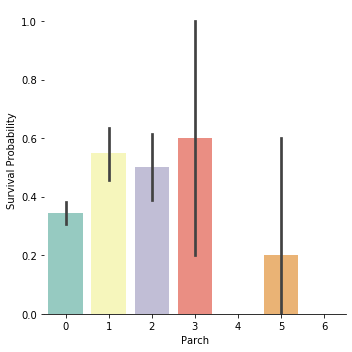

In [18]:
g = sns.catplot(x="Parch", y="Survived", data=data_train, kind="bar", palette="Set3")
g.despine(left=True)
g.set_ylabels("Survival Probability")

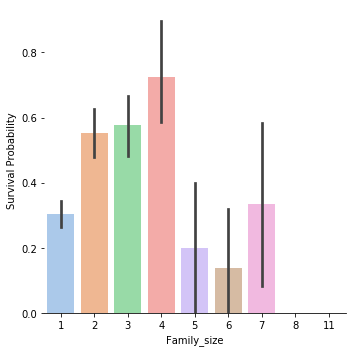

In [19]:
data_train['Family_size'] = data_train['SibSp']+data_train['Parch'] + 1  # adding 1 to count the person currently considered too
g = sns.catplot(x="Family_size", y="Survived", data=data_train, kind="bar", palette="pastel")
g.despine(left=True)
g.set_ylabels("Survival Probability")

**Observation 6:**  
_lesser group size, more chances of Survival_

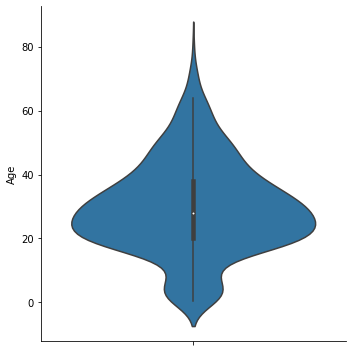

In [20]:
sns.catplot(y="Age", kind="violin", inner="box", data=data_train[data_train.Age >= 0])

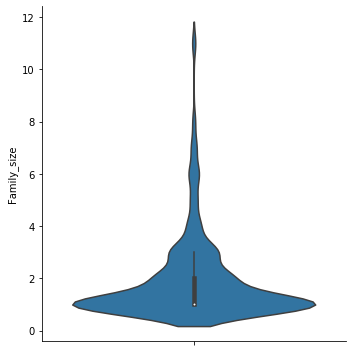

In [21]:
sns.catplot(y="Family_size", kind="violin", inner="box", data=data_train[data_train.SibSp.notna()])

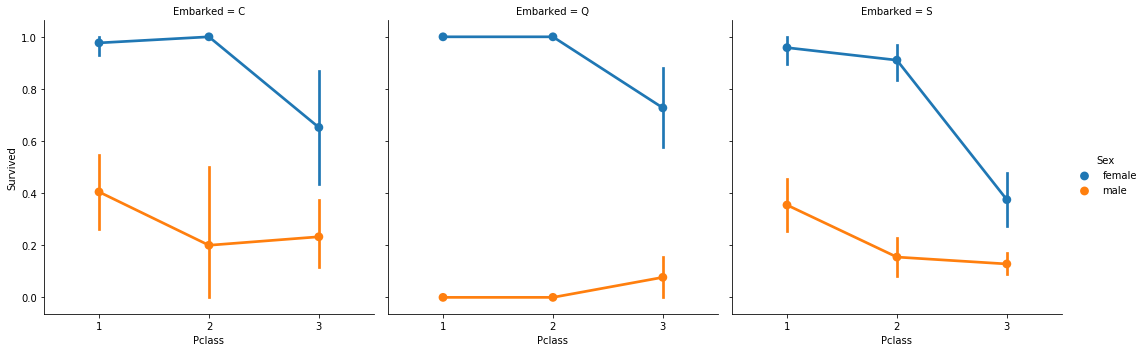

In [22]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", col="Embarked", col_wrap=3,
               data=data_train)

**Observation 7**  
_Males embarked at port Q in class 1, died (contrary to other ports)_

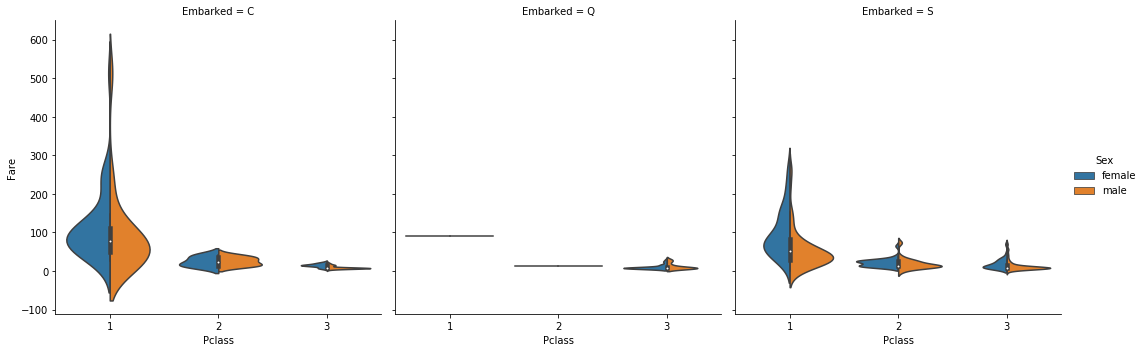

In [23]:
sns.catplot(x="Pclass", y="Fare", kind="violin", hue='Sex', split=True, col="Embarked", col_wrap=3, data=data_train)

**Can we use names ?**  
Names seem to contain individual prefixes, can they help with predicting survival?

In [24]:
# Name format is Lastname, Prefix. Firstname Middle Name ..
data_train['Name_Prefix'] = data_train['Name'].str.split(',', expand=True)[1].str.strip().str.split('.', expand=True)[0].str.lower()
data_train['Name_Prefix'].value_counts()

mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
mlle              2
col               2
major             2
the countess      1
don               1
jonkheer          1
sir               1
capt              1
mme               1
ms                1
lady              1
Name: Name_Prefix, dtype: int64

In [25]:
# re-assign some of the titles
data_train['Name_Prefix'] = data_train['Name_Prefix'].apply(lambda x: 'miss' if x in ['mlle','ms'] else x)
data_train['Name_Prefix'] = data_train['Name_Prefix'].apply(lambda x: 'mrs' if x in ['mme'] else x)

# replace rarely occuring prefixes
prefixes = (data_train['Name_Prefix'].value_counts() < 10)
data_train['Name_Prefix'] = data_train['Name_Prefix'].apply(lambda x: 'misc' if prefixes.loc[x] == True else x)
data_train['Name_Prefix'].value_counts()

mr        517
miss      185
mrs       126
master     40
misc       23
Name: Name_Prefix, dtype: int64

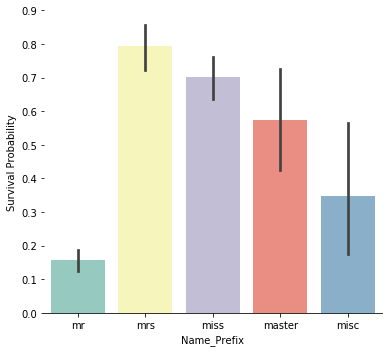

In [26]:
g = sns.catplot(x="Name_Prefix", y="Survived", data=data_train, kind="bar", palette="Set3", aspect = 1.1)
g.despine(left=True)
g.set_ylabels("Survival Probability")

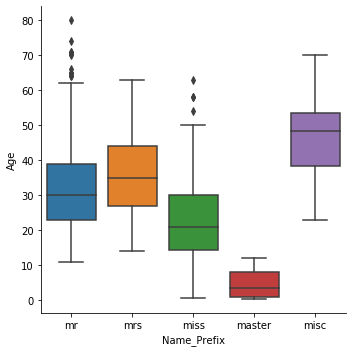

In [27]:
sns.catplot(x="Name_Prefix", y="Age", kind="box", data=data_train)

**Observation 8:**  
_Based on above two plots, Females (prefixes - Mrs, Miss, Ms) and children (prefixes - Master) have higher chances of survival as compared to Males (Mr.)_

### Data Preprocessing (and Feature Engineering)

Let's first combine both training and test data sets  
_another way is to make use of Pipelines_

In [28]:
data_train.shape, data_test.shape

((891, 16), (418, 11))

In [29]:
data_train = data_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked','Survived']]
data_all = data_train.append(data_test, ignore_index=True, sort=False)
data_all.shape

(1309, 12)

**Columns to keep** - PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [30]:
data_all[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

**Imputation**  
<u>Categorical</u> - Mode  
<u>Numerical</u> - Mean/Median

**Better imputation Suggestion**  
<u>Embarked</u> - Should be same for a Family? Checking if SibSp is one, then clustering on last name  ?  
<u>Fare</u> - Should be dependent on Pclass, Sex, Embarked, Age, Sex ?  
<u>Age</u> - Should be correlated with Fare, Emabrked, ~ same as SibSp if present (hard to find though)  
  
A good references for ways to impute missing values  
https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779  
https://www.hilarispublisher.com/open-access/a-comparison-of-six-methods-for-missing-data-imputation-2155-6180-1000224.pdf

In [31]:
data_all[data_all['Embarked'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0


We can directly use the **mode** for imputation. BUT we can see that both passengers are females, both Survived, traveling class 1, so from above visualizations, we can see that they _mostly_ embarked at port **C**

In [32]:
data_all.at[data_all[data_all['Embarked'].isna()].index,'Embarked'] = 'C'

In [33]:
data_all[data_all['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


Performing similar imputation for fare, using other fields to get more exact mean fare value

In [34]:
fare = np.mean(data_all[(data_all['Pclass']==3) & (data_all['Embarked']=='S') & (data_all['Sex']=='male') & (data_all['SibSp']==0) & (data_all['Parch']==0) & (data_all['Age'] > 50) & (data_all['PassengerId'] != 1044)]['Fare'].values)

In [35]:
data_all.at[data_all[data_all['Fare'].isna()].index,'Fare'] = fare

Let's create Name Prefix (Title) column before imputing Age as name title may help in grouping records and then calculating Age  
Another way for large datasets is to use **kNN or MICE for imputing** missing values (see _fancyimpute_ python package)

In [36]:
data_all['Name_Prefix'] = data_all['Name'].str.split(',', expand=True)[1].str.strip().str.split('.', expand=True)[0].str.lower()
data_all['Name_Prefix'] = data_all['Name_Prefix'].apply(lambda x: 'miss' if x in ['mlle','ms'] else x)
data_all['Name_Prefix'] = data_all['Name_Prefix'].apply(lambda x: 'mrs' if x in ['mme'] else x)
# replace rarely occuring prefixes
prefixes = (data_all['Name_Prefix'].value_counts() < 10)
data_all['Name_Prefix'] = data_all['Name_Prefix'].apply(lambda x: 'misc' if prefixes.loc[x] == True else x)

Due to some restrictions in my current python environment, I can not install and use fancyimpute or impyute library. So, for this exercise we will manually group the data and take mean

In [37]:
for title in data_all['Name_Prefix'].unique():
    for sex in data_all['Sex'].unique():
        mean_age = np.mean(data_all[(~data_all['Age'].isna()) & (data_all['Sex'] == sex) & (data_all['Name_Prefix'] == title)]['Age'].values)
        data_all.at[data_all[(data_all['Age'].isna()) & (data_all['Sex'] == sex) & (data_all['Name_Prefix'] == title)].index,'Age'] = mean_age

In [38]:
data_all[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Name_Prefix']].isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Name_Prefix    0
dtype: int64

Let's create one more column - Family_size and encode categorical columns before we move on to Data Modeling step  
  
While we used bins to visualize Age, Fare vs Survival and other attributes, it is (IMO) generally not a good idea to bin continuous variables while modeling.   
A good refernce - https://stats.stackexchange.com/a/68839

In [39]:
data_all['Family_size'] = data_all['SibSp']+data_all['Parch'] + 1

In [40]:
data_all = pd.get_dummies(data_all, columns=['Pclass','Sex','Embarked','Name_Prefix'])

Scaling Age and Fare data  
Scaling features isn't necessary for algorithms like Logistic regression or random forest but is required if we want to use SVM

We will use scikit-learn `StandardScaler` here.  
  
A good read for feature scaling - https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [41]:
age_scaler = StandardScaler()
data_all['Age'] = age_scaler.fit_transform(data_all['Age'].values.reshape(-1,1))
fare_scaler = StandardScaler()
data_all['Fare'] = fare_scaler.fit_transform(data_all['Fare'].values.reshape(-1,1))

In [42]:
data_all[['PassengerId','Age','Fare']].head(2)

,PassengerId,Age,Fare
0,1,-0.598479,-0.503165
1,2,0.614532,0.734814


Splitting the data in training and test again

In [43]:
data_train = data_all.iloc[:891]
data_test = data_all.iloc[891:]
data_train.shape, data_test.shape

((891, 23), (418, 23))

In [44]:
columns_to_not_use = ['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name']

### Data Modeling

<u>Steps:-</u>
* We will use ShuffleSplit (for training, cross-validation)
* We will train using _5_ most common algorithms and compare the test and train accuracy and their fit time-
>- Logistic Regression 
>- Random Foreast
>- K-Neighbours
>- MLPClassifier (neural network)
>- Support vector machines
  
You can experiment with other algorithms of your choice in the similar way.

In [45]:
cv_splits = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=42)

Now let's define the algorithms and their fit parameters (for performance tuning)

In [59]:
kwargs = {
    'logistic_regression':{'class_weight': None,  # default is None
                           'random_state': 42
                          },
    'random_forest': {'n_estimators': 10,              # default is 100
                     'max_depth': 6,                   # default is None
                     'max_features': 'auto',              # default is 'auto'
                     'max_leaf_nodes': 16,            # default is None
                     'class_weight': None,        # default is None
                     'criterion': 'entropy',      # default is gini
                     'oob_score': True,          # default is False
                     'random_state': 42
                     },
    'k_neighbours': {'n_neighbors': 10,                  # default is 5
                    'p': 2                              # default is 2 (euclidean_distance), p =1 (manhattan_distance)
                    },
    'mlp_classifier': {'hidden_layer_sizes': (16,8),      # default is (100,)
                      'activation': 'tanh',             # default is 'relu', try 'tanh', 'logistic'
                      'solver': 'adam',                 # default is 'adam', try ‘lbfgs’, ‘sgd’
                      'max_iter': 150,                   # default is 200
                      'random_state': 42},
    'svm': {'C': 2,                       # default is 1
           'kernel':'rbf',              # default is rbf, try linear, 'poly', 'sigmoid'
           'random_state': 42}
}

Why random_state = `42`? Well that's the answer to `the life the universe and everything!`. _**Hint:** Hitchhiker's Guide to the Galaxy_

In [60]:
algos = {
    'logistic_regression':linear_model.LogisticRegression(**kwargs['logistic_regression']),
    'random_forest':ensemble.RandomForestClassifier(**kwargs['random_forest']),
    'k_neighbours':neighbors.KNeighborsClassifier(**kwargs['k_neighbours']),
    'mlp_classifier':neural_network.MLPClassifier(**kwargs['mlp_classifier']),
    'svm':svm.SVC(**kwargs['svm'])
}

before we move on, let's create an empty dict to store results

In [61]:
cv_results = {'Algorithm':[],                     # algorithm name
              'Mean Train Accuracy':[],           # Mean of training accuracy on all splits
              'Mean Test Accuracy':[],            # Mean of test accuracy on all splits
              'Test Standard deviation':[],       # Standard deviation of test accuracy on all splits 
                                                  # (this is to know how worse the algorithm can perform)
              'Fit Time': []}                     # how fast the algorithm converges

In [62]:
for alg_name,alg in algos.items():
    cv_results['Algorithm'].append(alg_name)
    
    cross_val = model_selection.cross_validate(alg, 
                                               data_train.loc[:, ~data_train.columns.isin(columns_to_not_use)], 
                                               data_train['Survived'],
                                               cv  = cv_splits,
                                               return_train_score=True,
                                               return_estimator=False
                                              )
    
    cv_results['Mean Train Accuracy'].append(cross_val['train_score'].mean())
    cv_results['Mean Test Accuracy'].append(cross_val['test_score'].mean())
    cv_results['Test Standard deviation'].append(cross_val['test_score'].std()*3)
    cv_results['Fit Time'].append(cross_val['fit_time'].mean())
    

In [63]:
cv_results_df = pd.DataFrame.from_dict(cv_results)
cv_results_df.sort_values(by=['Mean Test Accuracy'], inplace=True, ascending=False)
cv_results_df

,Algorithm,Mean Train Accuracy,Mean Test Accuracy,Test Standard deviation,Fit Time
4,svm,0.835795,0.840672,0.050572,0.018740
1,random_forest,0.844141,0.840299,0.047439,0.011444
3,mlp_classifier,0.843499,0.838060,0.039798,0.421183
0,logistic_regression,0.830498,0.835448,0.044622,0.005787
2,k_neighbours,0.840770,0.814552,0.060706,0.004122


#### <font color=green><u>Observations:-</u></font>

* All algorithms with little hyperparameter tuning performs almost equally same on dataset
* random forest is performing well with least standard deviation
* SVM gives the highest test accuracy
* K-neighbours takes the least amount of time in fitting the dataset but performs bad (comparing to others)
* mlp_classifier (neural network) performs well too but also takes huge anmount of time in fitting

## Making Predictions

For making submission to this competition, we will use all _five_ algorithms to make predictions and find out the max accuracy achieved

In [51]:
# store the predictions in a dictionary
y_predicted = {}

In [52]:
for alg_name,alg in algos.items():
    
    alg.fit(data_train.loc[:, ~data_train.columns.isin(columns_to_not_use)], data_train['Survived'])
    y_predicted[alg_name] = alg.predict(data_test.loc[:, ~data_test.columns.isin(columns_to_not_use)])
    

In [53]:
# create a dataframe and write to a csv file
for alg_name in algos.keys():
    results_dict = {'PassengerId':data_test['PassengerId'].values.tolist(), 'Survived':list(map(int, y_predicted[alg_name]))}
    results_df = pd.DataFrame.from_dict(results_dict)
    results_df.to_csv(alg_name+'.csv', index=False)

## Final thoughts

<font color=blue><b>Maximum accuracy achieved on kaggle is by using Random Forest `0.79904`</b></font>  
  
This can further be increased by doing more **feature engineering** (e.g. exploring Ticket, Cabin and other features ?), **hyperparameter tuning** (using GridSearchCV), and **other algorithms** can also be tried to see if they provide more accuracy

This was my first competition and I had fun learning many new things. Hope you had fun too while going through this notebook